<a href="https://colab.research.google.com/github/swanand19/DL/blob/main/DL-2.2_Feed_forward_on_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [4]:
print("[INFO] Accessing MNIST..")
((trainX, trainY), (testX, testY)) = mnist.load_data()
trainX = trainX.reshape((trainX.shape[0], 28*28*1))
testX = testX.reshape((testX.shape[0], 28*28*1))
trainX = trainX.astype("float")/255.0
testX = testX.astype("float")/255.0

[INFO] Accessing MNIST..


In [5]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [6]:
model = Sequential()
model.add(Dense(256, input_shape = (784,), activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
print("[INFO] Training Netwok..")
adm = Adam(0.01)
model.compile(loss = "categorical_crossentropy", optimizer = adm, metrics = ["accuracy"])
H = model.fit(trainX, trainY, validation_data = (testX, testY), epochs = 100, batch_size = 128)

[INFO] Training Netwok..
Epoch 1/100
469/469 [==============================] - 5s 9ms/step - loss: 0.2460 - accuracy: 0.9260 - val_loss: 0.1839 - val_accuracy: 0.9462
Epoch 2/100
469/469 [==============================] - 5s 10ms/step - loss: 0.1256 - accuracy: 0.9631 - val_loss: 0.1256 - val_accuracy: 0.9651
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0981 - accuracy: 0.9714 - val_loss: 0.1331 - val_accuracy: 0.9645
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0896 - accuracy: 0.9746 - val_loss: 0.1094 - val_accuracy: 0.9714
Epoch 5/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0809 - accuracy: 0.9777 - val_loss: 0.0958 - val_accuracy: 0.9748
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0758 - accuracy: 0.9790 - val_loss: 0.1323 - val_accuracy: 0.9657
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0718 - accuracy: 0.9807 - val_loss: 0.

In [8]:
print("[INFO] Evaluating Network..")
predictions = model.predict(testX, batch_size = 128)
print(classification_report(testY.argmax(axis = 1),
                            predictions.argmax(axis = 1),
                            target_names = [str(x) for x in lb.classes_]))

[INFO] Evaluating Network..
79/79 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.99      0.96      0.97       982
           5       1.00      0.93      0.96       892
           6       0.89      0.99      0.94       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



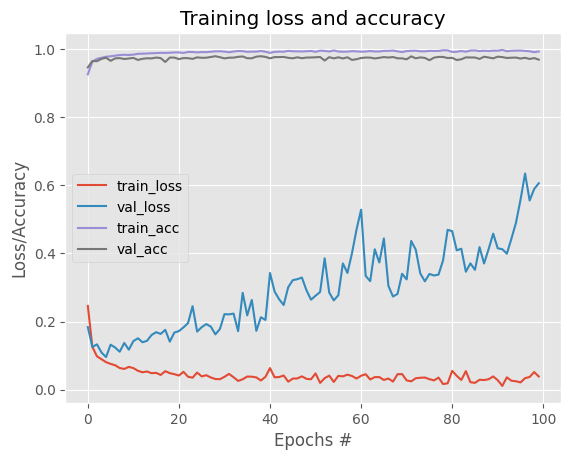

In [10]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label = "train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label = "train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label = "val_acc")
plt.title("Training loss and accuracy")
plt.xlabel("Epochs #")
plt.ylabel("Loss/Accuracy")
plt.legend()